In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import os
import csv
import datetime
from glob import glob



# Replace 'base_directory_pattern' with the path to the directory containing subfolders like '1697435524_A044DF'
# Use * as a wildcard for the numerical identifier
base_directory_pattern = r'C:\Users\anilp\Project_Files\*_A044DF'

# Initialize empty lists to store the extracted values
eda_values = []
bvp_values = []

# Get a list of folders matching the pattern
matching_folders = glob(base_directory_pattern)

# Loop through the matching folders
for matching_folder in matching_folders:
    # Look for the 'EDA.csv' and 'BVP.csv' files in the folder
    eda_file_path = os.path.join(matching_folder, 'EDA.csv')
    bvp_file_path = os.path.join(matching_folder, 'BVP.csv')

    # Check if both files exist before processing
    if os.path.exists(eda_file_path) and os.path.exists(bvp_file_path):
        # Open and read the 'EDA.csv' file
        with open(eda_file_path, 'r', newline='') as eda_csv_file:
            eda_csv_reader = csv.reader(eda_csv_file)

            # Extract values from the 'EDA.csv' file
            eda_values.extend([row[0] for row in eda_csv_reader][2:])

        # Open and read the 'BVP.csv' file
        with open(bvp_file_path, 'r', newline='') as bvp_csv_file:
            bvp_csv_reader = csv.reader(bvp_csv_file)

            # Extract values from the 'BVP.csv' file
            bvp_values.extend([row[0] for row in bvp_csv_reader][2:])

# Create dataframes for 'EDA' and 'BVP'
df_eda = pd.DataFrame({'EDA': eda_values})
df_bvp = pd.DataFrame({'BVP': bvp_values})

# Display the dataframes
print("DataFrame for EDA:")
print(df_eda)

print("\nDataFrame for BVP:")
print(df_bvp)

DataFrame for EDA:
             EDA
0       0.000000
1       0.832765
2       1.180231
3       1.618462
4       2.096440
...          ...
713275  0.107612
713276  0.108894
713277  0.108894
713278  0.110175
713279  0.110175

[713280 rows x 1 columns]

DataFrame for BVP:
            BVP
0         -0.00
1         -0.00
2         -0.00
3         -0.00
4         -0.00
...         ...
11413210  -4.09
11413211  -6.34
11413212  -8.31
11413213  -9.57
11413214  -9.76

[11413215 rows x 1 columns]


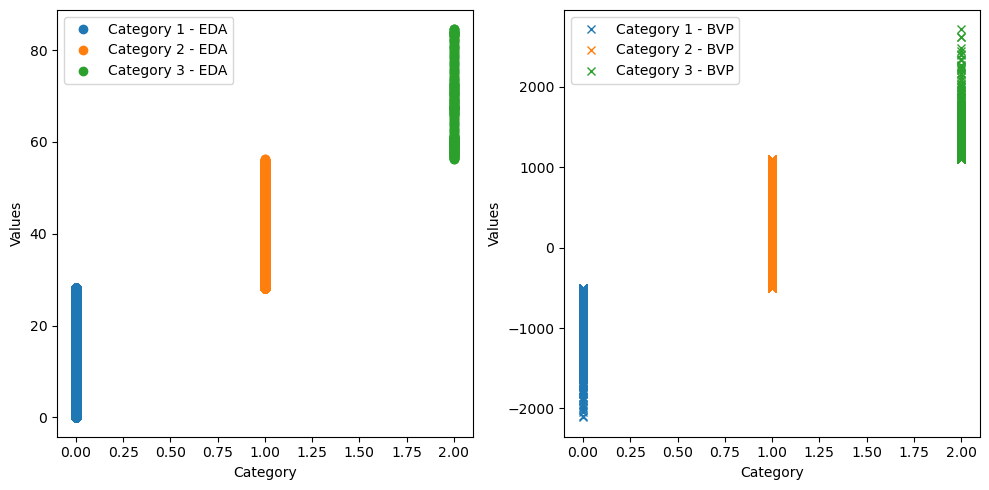

In [9]:

# Convert 'EDA' and 'BVP' columns to numeric
df_eda['EDA'] = pd.to_numeric(df_eda['EDA'], errors='coerce')
df_bvp['BVP'] = pd.to_numeric(df_bvp['BVP'], errors='coerce')

# Define the number of categories
num_categories = 3

# Calculate the bin width based on the data range for EDA
min_value_eda = df_eda['EDA'].min()
max_value_eda = df_eda['EDA'].max()
bin_width_eda = (max_value_eda - min_value_eda) / num_categories

# Create an empty dictionary to hold the categories for EDA
categories_eda = {i: [] for i in range(num_categories)}

# Categorize the values into the appropriate bins for EDA
for value in df_eda['EDA']:
    bin_index = int((value - min_value_eda) // bin_width_eda)
    bin_index = min(bin_index, num_categories - 1)  # Ensure it doesn't exceed the maximum bin index
    categories_eda[bin_index].append(value)

# Plot the values in each category for EDA
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
for bin_index, values in categories_eda.items():
    plt.plot([bin_index] * len(values), values, 'o', label=f'Category {bin_index + 1} - EDA')

# Add labels and legend for the first subplot
plt.xlabel('Category')
plt.ylabel('Values')
plt.legend()





# Calculate the bin width based on the data range for BVP
min_value_bvp = df_bvp['BVP'].min()
max_value_bvp = df_bvp['BVP'].max()
bin_width_bvp = (max_value_bvp - min_value_bvp) / num_categories

# Create an empty dictionary to hold the categories for BVP
categories_bvp = {i: [] for i in range(num_categories)}

# Categorize the values into the appropriate bins for BVP
for value in df_bvp['BVP']:
    bin_index = int((value - min_value_bvp) // bin_width_bvp)
    bin_index = min(bin_index, num_categories - 1)  # Ensure it doesn't exceed the maximum bin index
    categories_bvp[bin_index].append(value)

# Plot the values in each category for BVP
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
for bin_index, values in categories_bvp.items():
    plt.plot([bin_index] * len(values), values, 'x', label=f'Category {bin_index + 1} - BVP')

# Add labels and legend for the second subplot
plt.xlabel('Category')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [10]:
print(min_value_eda)
print(max_value_eda)

print(min_value_bvp)
print(max_value_bvp)

0.0
84.52076
-2110.09
2714.7
